Dataset Explanation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "classification.csv"
df = pd.read_csv(file_path)

# Display dataset information and preview
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Dataset Explanation**

This dataset appears to be a binary classification dataset where the goal is to predict a categorical outcome (y) based on various demographic and economic factors.

**Dataset Structure**
1. Number of Rows: 48,842
2. Number of Columns: 11
3. Target Variable: y (Binary: 0 or 1)
4. Feature Variables (Categorical):
* hours_per_week_bin: Categorized work hours per week.
* occupation_bin: Grouped occupation levels.
* msr_bin: Economic or marital status classification.
* capital_gl_bin: Categorized capital gain/loss.
* race_sex_bin: Combined race and gender category.
* education_num_bin: Grouped education years.
* education_bin: Education level classification.
* workclass_bin: Type of work category.
* age_bin: Age grouped into bins.
* flag: Indicates training (train) or test (test) set.

Classification Tasks: The goal of the classification model (Logistic/Probit Regression) is to predict y, which is a binary label (0 or 1). What are we classifying? We are predicting whether an individual earns more than 50K per year based on demographic and work-related factors.

Data preparation

In [ ]:
# Data Preparation
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

# Split dataset into train and test
y_train = df[df['flag']=='train']['y']
x_train = df[df['flag']=='train'][cat_feats]
x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

y_test = df[df['flag']=='test']['y']
x_test = df[df['flag']=='test'][cat_feats]
x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

# Convert to numpy arrays
x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

# Apply manual feature scaling
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean_train) / std_train
x_test_scaled = (x_test - mean_train) / std_train


Assignment

Logistic Regression Confusion Matrix:
 [[11619   816]
 [ 1739  2107]]
TN: 11619, FP: 816, FN: 1739, TP: 2107

Probit Regression Confusion Matrix:
 [[11685   750]
 [ 1776  2070]]
TN: 11685, FP: 750, FN: 1776, TP: 2070

Logistic Regression AUC = -0.8910
Probit Regression AUC   = -0.8961


<ipython-input-7-ab510dec2485>:158: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


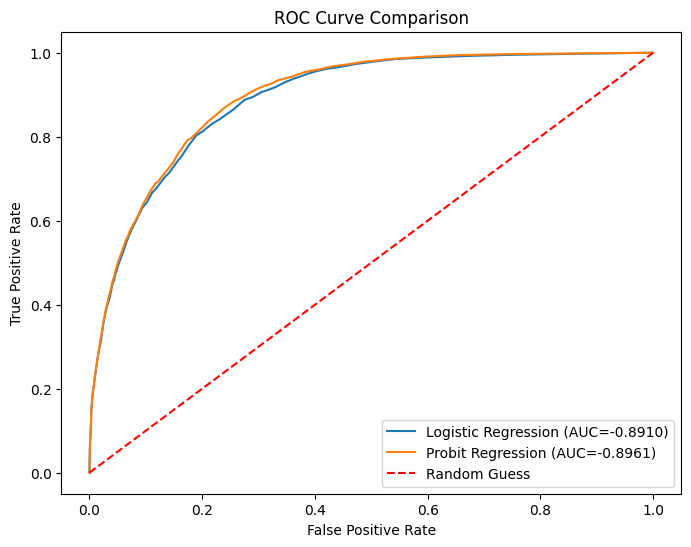

In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=3000):
        self.lr = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # 初始化權重與偏置
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 進行梯度下降
        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # 計算梯度
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # 更新參數
            self.weights -= self.lr * dw
            self.bias   -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        # 依照 threshold 進行二元分類判斷
        return (self.predict_proba(X) >= threshold).astype(int)

# Probit Regression from Scratch
from scipy.stats import norm  # Import the norm object
class ProbitRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=3000):
        self.lr = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        epsilon = 1e-9  # 避免除以 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            prob = norm.cdf(linear_model)  # Probit 概率 (Φ)

            # 正態分布的 pdf (φ)
            pdf_z = norm.pdf(linear_model)
            error = (prob - y)  # 預測值 - 真實值

            # denominator = Φ(z)*(1-Φ(z))，避免分母 0
            denominator = prob * (1 - prob) + epsilon

            # dL/dz = [φ(z) / (Φ(z)*(1-Φ(z)))] * (Φ(z) - y)
            dL_dz = (pdf_z / denominator) * error

            # 更新梯度
            dw = (1 / n_samples) * np.dot(X.T, dL_dz)
            db = (1 / n_samples) * np.sum(dL_dz)

            self.weights -= self.lr * dw
            self.bias   -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return norm.cdf(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Train Models
## Logistic Regression
lr_scratch = LogisticRegressionScratch(learning_rate=0.01, iterations=3000)
lr_scratch.fit(x_train_scaled, y_train)

## Probit Regression
pr_scratch = ProbitRegressionScratch(learning_rate=0.01, iterations=3000)
pr_scratch.fit(x_train_scaled, y_train)


# Predictions
## Logistic Regression Predictions
y_pred_lr = lr_scratch.predict(x_test_scaled, threshold=0.5)
y_prob_lr = lr_scratch.predict_proba(x_test_scaled)

## Probit Regression Predictions
y_pred_pr = pr_scratch.predict(x_test_scaled, threshold=0.5)
y_prob_pr = pr_scratch.predict_proba(x_test_scaled)


def compute_confusion_matrix(y_true, y_pred):
    """
    返回混淆矩陣:
        [[TN, FP],
         [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([
        [tn, fp],
        [fn, tp]
    ])

# 計算 Logistic Regression 的混淆矩陣
cm_lr = compute_confusion_matrix(y_test, y_pred_lr)
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()

# 計算 Probit Regression 的混淆矩陣
cm_pr = compute_confusion_matrix(y_test, y_pred_pr)
tn_pr, fp_pr, fn_pr, tp_pr = cm_pr.ravel()

print("Logistic Regression Confusion Matrix:\n", cm_lr)
print(f"TN: {tn_lr}, FP: {fp_lr}, FN: {fn_lr}, TP: {tp_lr}\n")

print("Probit Regression Confusion Matrix:\n", cm_pr)
print(f"TN: {tn_pr}, FP: {fp_pr}, FN: {fn_pr}, TP: {tp_pr}\n")



# Compute ROC Curves and AUC
def compute_roc_curve(y_true, y_scores, num_thresholds=100):
    """
    根據指定數量 thresholds，回傳 fpr, tpr, thresholds
    """
    thresholds = np.linspace(0, 1, num_thresholds)
    fpr_list = []
    tpr_list = []

    for th in thresholds:
        y_pred = (y_scores >= th).astype(int)
        cm = compute_confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # 避免分母 0
        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list), thresholds

def compute_auc(fpr, tpr):
    """
    使用梯形法 (Trapezoidal Rule) 計算 AUC
    """
    return np.trapz(tpr, fpr)

# Calculate ROC data
fpr_lr, tpr_lr, thresholds_lr = compute_roc_curve(y_test, y_prob_lr)
fpr_pr, tpr_pr, thresholds_pr = compute_roc_curve(y_test, y_prob_pr)

# Compute AUC
auc_lr = compute_auc(fpr_lr, tpr_lr)
auc_pr = compute_auc(fpr_pr, tpr_pr)

print(f"Logistic Regression AUC = {auc_lr:.4f}")
print(f"Probit Regression AUC   = {auc_pr:.4f}")

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.4f})')
plt.plot(fpr_pr, tpr_pr, label=f'Probit Regression (AUC={auc_pr:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Logistic Regression Confusion Matrix:
 [[11507   928]
 [ 1676  2170]]
TN: 11507, FP: 928, FN: 1676, TP: 2170

Probit Regression Confusion Matrix:
 [[11668   767]
 [ 1795  2051]]
TN: 11668, FP: 767, FN: 1795, TP: 2051

Logistic Regression AUC = -0.8835
Probit Regression AUC   = -0.8909


<ipython-input-8-0f7ed3a5fd34>:158: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(tpr, fpr)


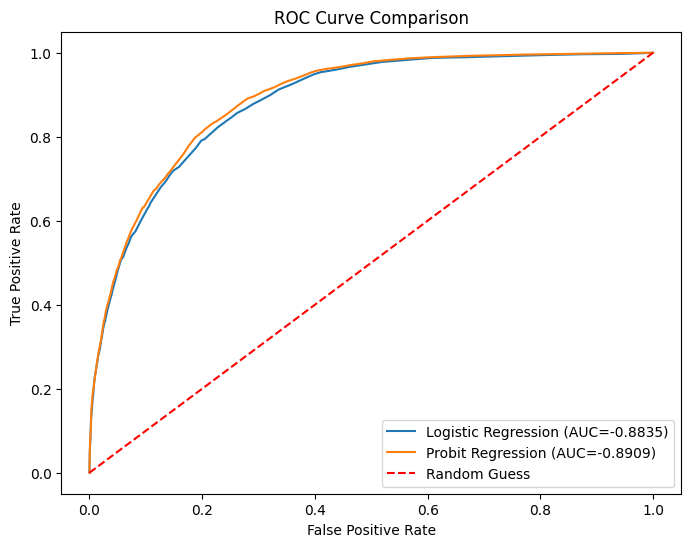

In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.lr = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # 初始化權重與偏置
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 進行梯度下降
        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # 計算梯度
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # 更新參數
            self.weights -= self.lr * dw
            self.bias   -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        # 依照 threshold 進行二元分類判斷
        return (self.predict_proba(X) >= threshold).astype(int)

# Probit Regression from Scratch
from scipy.stats import norm  # Import the norm object
class ProbitRegressionScratch:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.lr = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        epsilon = 1e-9  # 避免除以 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            prob = norm.cdf(linear_model)  # Probit 概率 (Φ)

            # 正態分布的 pdf (φ)
            pdf_z = norm.pdf(linear_model)
            error = (prob - y)  # 預測值 - 真實值

            # denominator = Φ(z)*(1-Φ(z))，避免分母 0
            denominator = prob * (1 - prob) + epsilon

            # dL/dz = [φ(z) / (Φ(z)*(1-Φ(z)))] * (Φ(z) - y)
            dL_dz = (pdf_z / denominator) * error

            # 更新梯度
            dw = (1 / n_samples) * np.dot(X.T, dL_dz)
            db = (1 / n_samples) * np.sum(dL_dz)

            self.weights -= self.lr * dw
            self.bias   -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return norm.cdf(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Train Models
## Logistic Regression
lr_scratch = LogisticRegressionScratch(learning_rate=0.001, iterations=10000)
lr_scratch.fit(x_train_scaled, y_train)

## Probit Regression
pr_scratch = ProbitRegressionScratch(learning_rate=0.001, iterations=10000)
pr_scratch.fit(x_train_scaled, y_train)


# Predictions
## Logistic Regression Predictions
y_pred_lr = lr_scratch.predict(x_test_scaled, threshold=0.5)
y_prob_lr = lr_scratch.predict_proba(x_test_scaled)

## Probit Regression Predictions
y_pred_pr = pr_scratch.predict(x_test_scaled, threshold=0.5)
y_prob_pr = pr_scratch.predict_proba(x_test_scaled)


def compute_confusion_matrix(y_true, y_pred):
    """
    返回混淆矩陣:
        [[TN, FP],
         [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([
        [tn, fp],
        [fn, tp]
    ])

# 計算 Logistic Regression 的混淆矩陣
cm_lr = compute_confusion_matrix(y_test, y_pred_lr)
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()

# 計算 Probit Regression 的混淆矩陣
cm_pr = compute_confusion_matrix(y_test, y_pred_pr)
tn_pr, fp_pr, fn_pr, tp_pr = cm_pr.ravel()

print("Logistic Regression Confusion Matrix:\n", cm_lr)
print(f"TN: {tn_lr}, FP: {fp_lr}, FN: {fn_lr}, TP: {tp_lr}\n")

print("Probit Regression Confusion Matrix:\n", cm_pr)
print(f"TN: {tn_pr}, FP: {fp_pr}, FN: {fn_pr}, TP: {tp_pr}\n")



# Compute ROC Curves and AUC
def compute_roc_curve(y_true, y_scores, num_thresholds=100):
    """
    根據指定數量 thresholds，回傳 fpr, tpr, thresholds
    """
    thresholds = np.linspace(0, 1, num_thresholds)
    fpr_list = []
    tpr_list = []

    for th in thresholds:
        y_pred = (y_scores >= th).astype(int)
        cm = compute_confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # 避免分母 0
        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list), thresholds

def compute_auc(fpr, tpr):
    """
    使用梯形法 (Trapezoidal Rule) 計算 AUC
    """
    return np.trapz(tpr, fpr)

# Calculate ROC data
fpr_lr, tpr_lr, thresholds_lr = compute_roc_curve(y_test, y_prob_lr)
fpr_pr, tpr_pr, thresholds_pr = compute_roc_curve(y_test, y_prob_pr)

# Compute AUC
auc_lr = compute_auc(fpr_lr, tpr_lr)
auc_pr = compute_auc(fpr_pr, tpr_pr)

print(f"Logistic Regression AUC = {auc_lr:.4f}")
print(f"Probit Regression AUC   = {auc_pr:.4f}")

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.4f})')
plt.plot(fpr_pr, tpr_pr, label=f'Probit Regression (AUC={auc_pr:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
